In [1]:
import os
import numpy as np
import efficientnet.tfkeras
from tensorflow.keras.models import load_model

INFO:tensorflow:Using local port 18976
INFO:tensorflow:Using local port 23808
INFO:tensorflow:Using local port 15180
INFO:tensorflow:Using local port 22009
INFO:tensorflow:Using local port 19852
INFO:tensorflow:Using local port 19234
INFO:tensorflow:Using local port 21770
INFO:tensorflow:Using local port 20185
INFO:tensorflow:Using local port 23618
INFO:tensorflow:Using local port 22230


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]=""

# load model

In [3]:
model_dir ='/media/tohn/SSD/ModelTrainByImages/R2_1/models/NorAb_multitask_15AB_5FP_2FC_1.h5'
model = load_model(model_dir)
height = width = model.input_shape[1]

In [4]:
# import tensorflow as tf

# tf.keras.utils.plot_model(
#     model, to_file='model.png', show_shapes=True, show_layer_names=True,
#     rankdir='TB', expand_nested=False, dpi=100
# )

In [5]:
# validation
import pandas as pd
base_dir  = '/media/tohn/SSD/Images/Image1/'
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/validationdf_fold1.csv')
validation_dir = os.path.join(base_dir, 'validation')

#Train
train_df = pd.read_csv( '/home/yupaporn/codes/USAI/traindf_fold1.csv')
base_dir0 = '/media/tohn/SSD/Images/Image1/'
os.chdir(base_dir0)
train_dir = os.path.join(base_dir0, 'train')

# Select Data

In [6]:
import pandas as pd
df0 = pd.read_csv (r'/home/yupaporn/codes/USAI/validationdf_fold1.csv')
print(df0 .shape)
dataframe = df0[(df0['Path Crop']!='None' )&(df0['Path Crop']!='Nan')]
# a = df01[df01['Case'].between(1, 10)]
# dataframe = df01[df01['Abs Position']!='P8']
print(dataframe.shape)
print('Normal: ',dataframe[dataframe['Class']=='Normal'].shape)
print('Abnormal: ',dataframe[dataframe['Class']=='Abnormal'].shape)
dataframe.head(5)

(656, 13)
(656, 13)
Normal:  (429, 13)
Abnormal:  (227, 13)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,filename
0,0,0,0,15,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3,AB01 P3-1 C015.JPG
1,1,1,1,15,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3,AB01 P1 C015.JPG
2,2,2,2,15,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3,AB01 P2 C015.JPG
3,3,3,3,15,P4,P42,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3,AB01 P4-2 C015.JPG
4,4,4,4,15,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3,AB01 P4-1 C015.JPG


In [7]:
batch_size = 64
epochs = 10

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      brightness_range=[0.5,1.5],
      shear_range=0.4,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
        dataframe = dataframe,
        directory = train_dir,
        x_col = 'Path Crop',
        y_col = 'Sub_class',
        target_size = (height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='categorical')

#label
labels = (train_generator.class_indices)
labels = dict((v,k.replace("C","")) for k,v in labels.items())
print(labels)

Found 656 validated image filenames belonging to 15 classes.
{0: 'AB01', 1: 'AB02', 2: 'AB03', 3: 'AB04', 4: 'AB05', 5: 'AB06', 6: 'AB07', 7: 'AB081', 8: 'AB082', 9: 'AB083', 10: 'AB09', 11: 'AB10', 12: 'AB11', 13: 'AB12', 14: 'Normal'}


# Prediction

In [8]:
# from tensorflow.keras.preprocessing import image
# img_path = dataframe['Path Crop'][0]
# # Read the image and resize it
# img = image.load_img(img_path, target_size=(height, width))
# # Convert it to a Numpy array with target shape.
# x = image.img_to_array(img)
# # Reshape
# x = x.reshape((1,) + x.shape)
# x /= 255.
# result = model.predict([x])
# # val = -1
# # idx = -1
# result[1][0]
# # result

In [9]:
# from tensorflow.keras.preprocessing import image
# def predict_image(img_path):
#     # Read the image and resize it
#     img = image.load_img(img_path, target_size=(height, width))
#     # Convert it to a Numpy array with target shape.
#     x = image.img_to_array(img)
#     # Reshape
#     x = x.reshape((1,) + x.shape)
#     x /= 255.
#     result = model.predict([x])
    
#     return result[0]

In [10]:
act = dataframe['Sub_class'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values
dataframe['Act_SubClass'] = act
Normal=dataframe[dataframe['Class']=='Normal']
Abnormal=dataframe[dataframe['Class']=='Abnormal']

In [11]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0][0]

pred_list = list()
prob_list = list()
pred_list_ = list()
img_path=Abnormal['Path Crop'].tolist()
for i in range(0,len(img_path)):
    img_path = Abnormal['Path Crop'].tolist()[i]
    result = predict_image(img_path)
    re_class = list()
    re_prop = list()
    while len(re_class) <3:
#         print(len(re_class))
        maxx = np.argmax(result)
#         if maxx != 'Normal':
#             maxx = 1
#         else:
#             maxx = 0
        re_class.append(labels[maxx])
        re_prop.append(result[maxx])
        result = np.where(result==result[maxx], 0, result)
        
    res_classlist = list()
    for i in range(0,len(re_class)):
        if re_class[i] !='Normal':
            x =1
            res_classlist.append(x)
        else:
            x =0
            res_classlist.append(x)
    pred_list.append(re_class)
    pred_list_.append(res_classlist)
    prob_list.append(re_prop)

In [12]:
# Abnormal = Abnormal.iloc[0:10,:]

In [13]:
# for i in range(0,len(re_class)):
#     if re_class[i] =='Normal':
#         re_class[i] ==0
#     else:
#         re_class[i] ==1

In [14]:
Abnormal['category'] = pred_list
Abnormal['category_def'] = pred_list_
Abnormal['Prob'] = prob_list

/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [15]:
Abnormal.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,filename,Act_SubClass,category,category_def,Prob
0,0,0,0,15,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3,AB01 P3-1 C015.JPG,1,"[AB01, AB02, AB082]","[1, 1, 1]","[0.9999981, 1.9418735e-06, 2.320363e-13]"
1,1,1,1,15,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3,AB01 P1 C015.JPG,1,"[AB01, AB02, Normal]","[1, 1, 0]","[0.9999442, 5.5776312e-05, 4.9491466e-13]"
2,2,2,2,15,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3,AB01 P2 C015.JPG,1,"[AB01, AB02, Normal]","[1, 1, 0]","[0.9999505, 4.94614e-05, 1.1914653e-12]"
3,3,3,3,15,P4,P42,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3,AB01 P4-2 C015.JPG,1,"[AB01, AB02, AB081]","[1, 1, 1]","[0.999281, 0.00071908714, 6.1519e-11]"
4,4,4,4,15,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3,AB01 P4-1 C015.JPG,1,"[AB01, Normal, AB082]","[1, 0, 1]","[1.0, 1.3207803e-12, 1.1216246e-12]"


In [16]:
ress = list()
ress_class = list()
for i in range(0,len(Abnormal)):
    if Abnormal['Act_SubClass'].tolist()[i] in Abnormal['category_def'].tolist()[i]:
        res = 1
    else:
        res = 0
    ress.append(res)
Abnormal['Pred'] = ress

/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [17]:
Abnormal.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,filename,Act_SubClass,category,category_def,Prob,Pred
0,0,0,0,15,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3,AB01 P3-1 C015.JPG,1,"[AB01, AB02, AB082]","[1, 1, 1]","[0.9999981, 1.9418735e-06, 2.320363e-13]",1
1,1,1,1,15,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3,AB01 P1 C015.JPG,1,"[AB01, AB02, Normal]","[1, 1, 0]","[0.9999442, 5.5776312e-05, 4.9491466e-13]",1
2,2,2,2,15,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3,AB01 P2 C015.JPG,1,"[AB01, AB02, Normal]","[1, 1, 0]","[0.9999505, 4.94614e-05, 1.1914653e-12]",1
3,3,3,3,15,P4,P42,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3,AB01 P4-2 C015.JPG,1,"[AB01, AB02, AB081]","[1, 1, 1]","[0.999281, 0.00071908714, 6.1519e-11]",1
4,4,4,4,15,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3,AB01 P4-1 C015.JPG,1,"[AB01, Normal, AB082]","[1, 0, 1]","[1.0, 1.3207803e-12, 1.1216246e-12]",1


In [ ]:
# #create CF 
# data = {'Actual': act,'Predicted' : pred,}
# df = pd.DataFrame(data, columns=['Actual','Predicted'])
# conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

# #Confusion matrix
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# cm = confusion_matrix(act, pred)

# #plot Confusion matrix
# import seaborn as sns
# sns.set()
# fig, ax = plt.subplots(figsize=(8, 5))

# ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
# ax.set_title('Confusion matrix',fontsize=20)
# ax.set_ylabel('True label',fontsize=18)
# ax.set_xlabel('Predicted label',fontsize=18)

In [ ]:
# dataframe

### Normal

In [30]:
# from tensorflow.keras.preprocessing import image
# def predict_image(img_path):
#     # Read the image and resize it
#     img = image.load_img(img_path, target_size=(height, width))
#     # Convert it to a Numpy array with target shape.
#     x = image.img_to_array(img)
#     # Reshape
#     x = x.reshape((1,) + x.shape)
#     x /= 255.
#     result = model.predict([x])
    
#     return result[0][0]

# pred_list = list()
# prob_list = list()
# pred_list_ = list()
# img_path=Normal['Path Crop'].tolist()
# for i in range(0,len(img_path)):
#     img_path = Normal['Path Crop'].tolist()[i]
#     result = predict_image(img_path)
#     re_class = list()
#     re_prop = list()
#     while len(re_class) <3:
# #         print(len(re_class))
#         maxx = np.argmax(result)
# #         if maxx != 'Normal':
# #             maxx = 1
# #         else:
# #             maxx = 0
#         re_class.append(labels[maxx])
#         re_prop.append(result[maxx])
#         result = np.where(result==result[maxx], 0, result)
        
#     res_classlist = list()
#     for i in range(0,len(re_class)):
#         if re_class[i] !='Normal':
#             x =1
#             res_classlist.append(x)
#         else:
#             x =0
#             res_classlist.append(x)
#     pred_list.append(re_class)
#     pred_list_.append(res_classlist)
#     prob_list.append(re_prop)

In [31]:
# Normal['category'] = pred_list
# Normal['category_def'] = pred_list_
# Normal['Prob'] = prob_list

In [32]:
# ress = list()
# ress_class = list()
# for i in range(0,len(Normal)):
#     if Normal['Act_SubClass'].tolist()[i] in Normal['category_def'].tolist()[i]:
#         res = 0
#     else:
#         res = 0
#     ress.append(res)
# Normal['Pred'] = ress

In [33]:
# Normal.head()

In [34]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0][0]

#Predict
pred_list = list()
prob_list = list()
img_path=Normal['Path Crop'].tolist()
for i in range(0,len(img_path)):
    pred_list.append(labels[np.argmax(predict_image(img_path[i]))])
    if np.argmax(predict_image(img_path[i])) == 0:
        prob_list.append(predict_image(img_path[i])[0])
    elif np.argmax(predict_image(img_path[i])) == 1:
        prob_list.append(predict_image(img_path[i])[1])
    elif np.argmax(predict_image(img_path[i])) == 2:
        prob_list.append(predict_image(img_path[i])[2])
    elif np.argmax(predict_image(img_path[i])) == 3:
        prob_list.append(predict_image(img_path[i])[3])
    elif np.argmax(predict_image(img_path[i])) == 4:
        prob_list.append(predict_image(img_path[i])[4])       
    elif np.argmax(predict_image(img_path[i])) == 5:
        prob_list.append(predict_image(img_path[i])[5])
    elif np.argmax(predict_image(img_path[i])) == 6:
        prob_list.append(predict_image(img_path[i])[6])
    elif np.argmax(predict_image(img_path[i])) == 7:
        prob_list.append(predict_image(img_path[i])[7])
    elif np.argmax(predict_image(img_path[i])) == 8:
        prob_list.append(predict_image(img_path[i])[8])
    elif np.argmax(predict_image(img_path[i])) == 9:
        prob_list.append(predict_image(img_path[i])[9])       
    elif np.argmax(predict_image(img_path[i])) == 10:
        prob_list.append(predict_image(img_path[i])[10])
    elif np.argmax(predict_image(img_path[i])) == 11:
        prob_list.append(predict_image(img_path[i])[11])
    elif np.argmax(predict_image(img_path[i])) == 12:
        prob_list.append(predict_image(img_path[i])[12])
    elif np.argmax(predict_image(img_path[i])) == 13:
        prob_list.append(predict_image(img_path[i])[13])
    elif np.argmax(predict_image(img_path[i])) == 14:
        prob_list.append(predict_image(img_path[i])[14])
#     print(i)
#     print(np.argmax(predict_image(img_path[i])))

Normal['category'] = pred_list
Normal['Prob'] = prob_list

In [ ]:
# Normal.drop(['Pred'], axis=1)

In [ ]:
# Normal['Sub_class'].tolist()[0]

In [35]:
ress = list()
ress_class = list()
for i in range(0,len(Normal)):
    if Normal['Sub_class'].tolist()[i] == Normal['category'].tolist()[i]:
        res = 0
    else:
        res = 1
    ress.append(res)
Normal['Pred'] = ress

In [36]:
frames = [Abnormal, Normal]
dataframe = pd.concat(frames)

In [37]:
# os.chdir( '/home/yupaporn/codes/USAI/')
# dataframe.to_csv('Dataframe_15AB_1FC.csv')

# Visualization

In [38]:
data_train = dataframe
#เช็คคลาสใน Predicted
pred_class = set(data_train['Pred'])
print('Predicted : ',len(pred_class))
print(pred_class)
#เช็คคลาสใน Actual
classe = act= data_train['Sub_class'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values
print('Actual : ',len(classe))
print(classe)

Predicted :  2
{0, 1}
Actual :  656
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [39]:
import numpy as np
from sklearn.metrics import confusion_matrix
act =data_train['Sub_class'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values
pred = data_train['Pred'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 96.1890243902439%
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       429
           1       0.90      1.00      0.95       227

    accuracy                           0.96       656
   macro avg       0.95      0.97      0.96       656
weighted avg       0.97      0.96      0.96       656



### Confusion matrix

Text(0.5, 21.5, 'Predicted label')

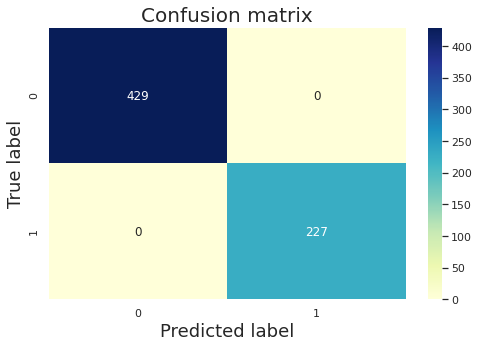

In [28]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

### ROC curve 

#### -  confusion_matrix function 

In [17]:
data_train

,Unnamed: 0,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop,Views,fold,category,Prob
0,0,15,P3,P31,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3,P31,0.999989
1,1,15,P1,P1,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3,P31,0.889519
2,2,15,P2,P2,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-A,3,P1,0.805769
3,3,15,P4,P42,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3,P42,0.886929
4,4,15,P4,P41,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,FP-B,3,P41,0.999998
...,...,...,...,...,...,...,...,...,...,...,...,...
648,6477,613,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,3,P72,0.994812
649,6512,573,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,3,P32,0.341806
650,6532,499,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,3,P52,0.993610
651,6538,581,P7,P72,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...,FP-D,3,P72,0.970778


In [22]:
def confusion_matrix_all(data_train,classes,threshold,sub=True):


    #1. manage data  --------------------------------------------------------------------------------------------------------------------------------------------------

    if sub ==True:

        p1 = data_train #Input table
   
        if classes =='P1':
            act= p1['category'].map({'P1':1,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':1,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P2':
            act= p1['category'].map({'P1':0,'P2':1,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':1,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P31':
            act= p1['category'].map({'P1':0,'P2':0,'P31':1,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':0,'P31':1,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P32':
            act= p1['category'].map({'P1':0,'P2':0,'P31':0,'P32':1,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':0,'P31':0,'P32':1,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P41':
            act= p1['category'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':1,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':1,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P42':
            act= p1['category'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':1,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':1,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P51':
            act= p1['category'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':1,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':1,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P52':
            act= p1['category'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':1,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':1,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P61':
            act= p1['category'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':1,'P62':0,'P71':0,'P72':0,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':1,'P62':0,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P62':
            act= p1['category'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':1,'P71':0,'P72':0,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':1,'P71':0,'P72':0,'P8':0}).values
        elif classes =='P71':
            act= p1['category'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':1,'P72':0,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':1,'P72':0,'P8':0}).values
        elif classes =='P72':
            act= p1['category'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':1,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':1,'P8':0}).values
        elif classes =='P8':
            act= p1['category'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':1}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':1}).values
#             act= p1['2Actual'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values
#             pred = p1['3Predicted'].map({'P1':0,'P2':0,'P31':0,'P32':0,'P41':0,'P42':0,'P51':0,'P52':0,'P61':0,'P62':0,'P71':0,'P72':0,'P8':0}).values

        prob_all = p1['Prob'].to_numpy()

    else :
        p1 = data_train #Input table

        if classes =='P1':
            act= p1['category'].map({'P1':1,'P2':0,'P3':0,'P4':0,'P5':0,'P6':0,'P7':0,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':1,'P2':0,'P3':0,'P4':0,'P5':0,'P6':0,'P7':0,'P8':0}).values
        elif classes =='P2':
            act= p1['category'].map({'P1':0,'P2':1,'P3':0,'P4':0,'P5':0,'P6':0,'P7':0,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':1,'P3':0,'P4':0,'P5':0,'P6':0,'P7':0,'P8':0})
            pred = pred.values
        elif classes =='P3':
            act= p1['category'].map({'P1':0,'P2':0,'P3':1,'P4':0,'P5':0,'P6':0,'P7':0,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':0,'P3':1,'P4':0,'P5':0,'P6':0,'P7':0,'P8':0}).values
        elif classes =='P4':
            act= p1['category'].map({'P1':0,'P2':0,'P3':0,'P4':1,'P5':0,'P6':0,'P7':0,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':0,'P3':0,'P4':1,'P5':0,'P6':0,'P7':0,'P8':0}).values
        elif classes =='P5':
            act= p1['category'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':1,'P6':0,'P7':0,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':1,'P6':0,'P7':0,'P8':0}).values
        elif classes =='P6':
            act= p1['category'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':0,'P6':1,'P7':0,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':0,'P6':1,'P7':0,'P8':0}).values
        elif classes =='P7':
            act= p1['category'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':0,'P6':0,'P7':1,'P8':0}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':0,'P6':0,'P7':1,'P8':0}).values
        elif classes =='P8':
            act= p1['category'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':0,'P6':0,'P7':0,'P8':1}).values
            pred = p1['Sub Position'].map({'P1':0,'P2':0,'P3':0,'P4':0,'P5':0,'P6':0,'P7':0,'P8':1}).values

        prob_all = p1['4Class_prob'].to_numpy()
        
    #2. เงื่อนไข ---------------------------------------------------------------------------------------------------------------------------------------------

    TP,TN,FP,FN,posi_tp,posi_tn,posi_fp,posi_fn = list(), list(), list(), list(),list(), list(), list(), list()
    for i in range(len(act)):
        if act[i] & pred[i]  == 1:
            tp = 1
            po_tp = i
            TP.append(tp)
            posi_tp.append(po_tp)
        elif act[i] == 0: 
            if pred[i]  == 1:
                fp = 1
                po_fp = i
                FP.append(fp)
                posi_fp.append(po_fp)  

        if act[i] == 1: 
            if pred[i]  == 0:
                fn = 1
                po_fn = i
                FN.append(fn)
                posi_fn.append(po_fn) 
        elif act[i] | pred[i]  == 0:
            tn = 1
            po_tn = i
            TN.append(tn)
            posi_tn.append(po_tn)



    print('(',len(TN),',', len(FP),',', len(FN),',', len(TP) ,')')

# 3. threshold ----------------------------------------------------------------

    if  posi_tp or posi_fp  != 0:      
                #Keep only interested TP, FP 
        inter_point = posi_tp+posi_fp
        inter = act[inter_point]
        prob = prob_all[inter_point]

        import numpy as np
        from sklearn.metrics import confusion_matrix

#         threshold = 0
        t = prob >= threshold
        t = np.where(t=='True', 1, t) #repalce True-1,False-0

        tp_new,tn_new,fp_new,fn_new = list(),list(),list(),list()
        for i in range(len(inter)):
            if inter[i] & t[i]  == 1:
                tp0 = 1
                tp_new.append(tp0)

            elif inter[i] == 0: 
                if t[i]  == 1:
                    fp0 = 1
                    fp_new.append(fp0) 

            if inter[i] == 1: 
                if t[i]  == 0:
                    fn0 = 1
                    fn_new.append(fn0)

            elif inter[i] | t[i]  == 0:
                tn0 = 1
                tn_new.append(tn0)  #find  confusion matrix

        if TN.count(1) !=0:
            tn_new = TN.count(1)+tn_new.count(1)
        else : 
            tn_new = tn_new.count(1)    
        if FN.count(1) !=0:
            fn_new = FN.count(1)+fn_new.count(1)
        else :
            fn_new = fn_new.count(1)

        fp_new = fp_new.count(1)
        tp_new = tp_new.count(1)

        print('(TN,FP,FN,TP)')
        print('(',tn_new,',', fp_new,',', fn_new,',', tp_new ,')')

        return tn_new, fp_new, fn_new, tp_new

    else :
        print('(TN,FP,FN,TP)')
        print('(',TN.count(1),',', FP.count(1),',', FN.count(1),',', TP.count(1) ,')')

        return TN.count(1),  FP.count(1), FN.count(1), TP.count(1) 

In [23]:
#Test function
threshold = 0.5
# classes =['P1','P2','P31','P32','P41','P42','P51','P52','P61','P62','P71','P72','P8']
classes ='P1'
confusion_matrix_all(data_train,classes,threshold,True)

( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 565 , 38 , 25 , 25 )


/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:130: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


(565, 38, 25, 25)

In [24]:
import numpy as np
# classes =['P1','P2','P3','P4','P5','P6','P7','P8']
# classes =['P2']
classes =['P1','P2','P31','P32','P41','P42','P51','P52','P61','P62','P71','P72','P8']
threshold = np.arange(0.0, 1.002, 0.001)

TN, FP, FN, TP = list(),list(),list(),list()
precision, recall, ACC, TPR, FPR, SPEC = list(),list(),list(),list(),list(),list()

for i in threshold:
    TN0, FP0, FN0, TP0 = list(),list(),list(),list()
    precision0, recall0, ACC0, TPR0, FPR0, SPEC0 = list(),list(),list(),list(),list(),list()
    
    for j in classes:
        tn,fp,fn,tp = confusion_matrix_all(data_train,j,i,sub=True) 
        try:
            pre = tp/(tp+fp)
            re= tp/(tp+fn)
            acc = (tp+tn)/(tp+tn+fp+fn)
            tpr = tp/(tp+fn)
            fpr = fp/(fp+tn)
            spec = 1-(tn/(tn+fp))
        except ZeroDivisionError:
            pre,re,acc,tpr,fpr,spec =1,0,0,0,0,0      
            
        TP0.append(tp)
        TN0.append(tn)
        FP0.append(fp)
        FN0.append(fn)
        precision0.append(pre)
        recall0.append(re)
        ACC0.append(acc)
        TPR0.append(re)
        FPR0.append(fpr)       
        SPEC0.append(spec)
        
    precision.append(precision0)
    recall.append(recall0)
    ACC.append(ACC0)
    TPR.append(TPR0)
    FPR.append(FPR0)       
    SPEC.append(SPEC0)

( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 2

/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:130: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 

( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 4

(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 4

( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 

( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 2

( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 ,

( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 4

( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,

( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,

( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 ,

( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 2

(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 4

( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN

( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,

( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,

( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 4

( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 4

( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 1

( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 3

( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,

( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN

( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,

( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 587 , 13 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 4

( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 597 , 25 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,

( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 598 , 24 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 2

( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 598 , 24 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 563 , 40 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,

( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 564 , 39 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 598 , 24 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 571 , 10 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 564 , 39 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 1

( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 598 , 24 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 572 , 9 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 564 , 39 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 593 , 39 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 598 , 24 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,T

(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 598 , 24 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 572 , 9 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 564 , 39 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 594 , 38 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 598 , 24 , 9 , 22 )
( 575 , 11 , 18 , 49

( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 564 , 39 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 594 , 38 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 552 , 21 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 598 , 24 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 18 , 49 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,T

( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 564 , 39 , 23 , 27 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 595 , 37 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 553 , 20 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 598 , 24 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 

( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 596 , 36 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 553 , 20 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 598 , 24 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 564 , 39 , 24 , 26 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 596 , 36 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 553 , 20 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34

(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 599 , 23 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 564 , 39 , 24 , 26 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 596 , 36 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 553 , 20 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 599 , 23 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40

( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 599 , 23 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 564 , 39 , 24 , 26 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 596 , 36 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 553 , 20 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 599 , 23 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,T

( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 564 , 39 , 24 , 26 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 596 , 36 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 553 , 20 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 550 , 17 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 599 , 23 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 564 , 39 , 24 , 2

(TN,FP,FN,TP)
( 596 , 36 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 553 , 20 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 551 , 16 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 599 , 23 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 564 , 39 , 24 , 26 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 596 , 36 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 553 , 20 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 551 , 16 , 52 , 34 )
( 597 , 37 , 8 , 11

( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 551 , 16 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 599 , 23 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 565 , 38 , 24 , 26 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 596 , 36 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 553 , 20 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 551 , 16 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45

( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 553 , 20 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 551 , 16 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 579 , 18 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 599 , 23 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 565 , 38 , 24 , 26 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 597 , 35 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 553 , 20 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 551 , 16 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11

( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 565 , 38 , 24 , 26 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 597 , 35 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 553 , 20 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 551 , 16 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 597 , 37 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 580 , 17 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 599 , 23 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 575 , 11 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 565 , 38 , 24 , 26 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 598 , 34 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 553 , 20 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,T

( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 598 , 34 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 553 , 20 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 551 , 16 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 598 , 36 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 580 , 17 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 600 , 22 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 576 , 10 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 565 , 38 , 24 , 26 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 598 , 34 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 553 , 20 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 551 , 16 , 52 , 34

( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 551 , 16 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 598 , 36 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 580 , 17 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 600 , 22 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 576 , 10 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 565 , 38 , 24 , 26 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 598 , 34 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 553 , 20 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 551 , 16 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 598 , 36 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 580 , 17 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 600 , 22 , 9 , 22

( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 598 , 34 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 553 , 20 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 551 , 16 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 598 , 36 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 580 , 17 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 600 , 22 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 576 , 10 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 10 , 4 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 29 , 43 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 565 , 38 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 598 , 34 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 553 , 20 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 551 , 16 , 52 , 34

( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 30 , 42 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 566 , 37 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 598 , 34 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 554 , 19 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 552 , 15 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 598 , 36 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 580 , 17 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 600 , 22 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 576 , 10 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 30 , 42 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 566 , 37 , 25 , 2

( 624 , 15 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 30 , 42 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 566 , 37 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 599 , 33 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 556 , 17 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 565 , 7 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 552 , 15 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 598 , 36 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 581 , 16 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 600 , 22 , 9 , 22 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 576 , 10 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 30 , 42 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,T

( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 30 , 42 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 566 , 37 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 600 , 32 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 556 , 17 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 566 , 6 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 552 , 15 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 599 , 35 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 581 , 16 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 600 , 22 , 10 , 21 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 576 , 10 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 30 , 42 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20

( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 30 , 42 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 566 , 37 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 602 , 30 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 556 , 17 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 566 , 6 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 552 , 15 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 600 , 34 , 8 , 11 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 581 , 16 , 11 , 45 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 600 , 22 , 10 , 21 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 576 , 10 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 30 , 42 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 566 , 37 , 25 , 

( 573 , 8 , 30 , 42 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 566 , 37 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 603 , 29 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 556 , 17 , 32 , 48 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 566 , 6 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 553 , 14 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 600 , 34 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 582 , 15 , 12 , 44 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 600 , 22 , 10 , 21 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 576 , 10 , 19 , 48 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 30 , 42 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 566 , 37 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 603 , 29 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,T

( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 567 , 36 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 603 , 29 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 556 , 17 , 33 , 47 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 566 , 6 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 554 , 13 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 600 , 34 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 582 , 15 , 12 , 44 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 600 , 22 , 10 , 21 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 576 , 10 , 20 , 47 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 30 , 42 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 617 , 13 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 567 , 36 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 603 , 29 , 4 , 17 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 556 , 17 , 33 , 47 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,

( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 30 , 42 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 618 , 12 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 568 , 35 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 603 , 29 , 7 , 14 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 556 , 17 , 33 , 47 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 566 , 6 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 554 , 13 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 600 , 34 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 582 , 15 , 12 , 44 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 600 , 22 , 10 , 21 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 578 , 8 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 30 , 42 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 618 , 12 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 568 , 35 , 25 , 2

( 578 , 8 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 13 , 40 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 30 , 42 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 618 , 12 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 568 , 35 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 603 , 29 , 7 , 14 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 556 , 17 , 33 , 47 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 566 , 6 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 554 , 13 , 52 , 34 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 600 , 34 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 582 , 15 , 12 , 44 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 600 , 22 , 11 , 20 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 578 , 8 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 588 , 12 , 14 , 39 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 30 , 42 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP

( 604 , 28 , 8 , 13 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 556 , 17 , 34 , 46 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 566 , 6 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 554 , 13 , 53 , 33 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 601 , 33 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 582 , 15 , 12 , 44 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 600 , 22 , 11 , 20 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 578 , 8 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 589 , 11 , 14 , 39 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 30 , 42 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 618 , 12 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 570 , 33 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 604 , 28 , 8 , 13 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 556 , 17 , 34 , 46 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 566 , 6 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 554 , 13 , 53 , 33 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,T

( 570 , 33 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 604 , 28 , 8 , 13 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 556 , 17 , 34 , 46 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 566 , 6 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 554 , 13 , 53 , 33 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 601 , 33 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 582 , 15 , 12 , 44 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 601 , 21 , 11 , 20 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 578 , 8 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 590 , 10 , 14 , 39 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 30 , 42 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 618 , 12 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 570 , 33 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 604 , 28 , 8 , 13 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 556 , 17 , 34 , 46 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 566 , 6 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,T

( 583 , 14 , 12 , 44 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 601 , 21 , 11 , 20 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 578 , 8 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 14 , 39 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 30 , 42 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 618 , 12 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 571 , 32 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 605 , 27 , 8 , 13 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 557 , 16 , 34 , 46 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 566 , 6 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 555 , 12 , 53 , 33 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 602 , 32 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 583 , 14 , 12 , 44 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 601 , 21 , 11 , 20 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 578 , 8 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP

(TN,FP,FN,TP)
( 591 , 9 , 14 , 39 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 571 , 32 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 605 , 27 , 8 , 13 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 557 , 16 , 34 , 46 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 566 , 6 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 555 , 12 , 53 , 33 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 602 , 32 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 584 , 13 , 12 , 44 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 601 , 21 , 11 , 20 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 578 , 8 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 624 , 15 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 14 , 39 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 571 , 32 , 25 , 25 )
( 593 , 39 , 4 , 17 )

( 605 , 27 , 8 , 13 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 557 , 16 , 34 , 46 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 566 , 6 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 555 , 12 , 55 , 31 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 602 , 32 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 584 , 13 , 12 , 44 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 601 , 21 , 11 , 20 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 578 , 8 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 625 , 14 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 15 , 38 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 572 , 31 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 605 , 27 , 8 , 13 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 557 , 16 , 34 , 46 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 566 , 6 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 555 , 12 , 55 , 31 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP

( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 557 , 16 , 34 , 46 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 566 , 6 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 555 , 12 , 55 , 31 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 602 , 32 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 584 , 13 , 12 , 44 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 602 , 20 , 11 , 20 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 578 , 8 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 625 , 14 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 15 , 38 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 573 , 30 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 606 , 26 , 8 , 13 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 557 , 16 , 34 , 46 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 566 , 6 , 54 , 27 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 555 , 12 , 55 , 31 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 602 , 32 , 9 , 10 

( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 578 , 8 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 626 , 13 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 15 , 38 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 573 , 30 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 607 , 25 , 8 , 13 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 557 , 16 , 34 , 46 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 567 , 5 , 55 , 26 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 555 , 12 , 57 , 29 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 603 , 31 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 584 , 13 , 12 , 44 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 602 , 20 , 11 , 20 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 578 , 8 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 626 , 13 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 15 , 38 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )

( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 573 , 30 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 608 , 24 , 8 , 13 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 557 , 16 , 34 , 46 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 567 , 5 , 55 , 26 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 555 , 12 , 57 , 29 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 603 , 31 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 585 , 12 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 602 , 20 , 11 , 20 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 580 , 6 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 627 , 12 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 15 , 38 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 573 , 30 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 608 , 24 , 8 , 13 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 557 , 16 , 34 , 46 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 567 , 5 , 55 , 26 

( 627 , 12 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 15 , 38 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 573 , 30 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 608 , 24 , 8 , 13 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 557 , 16 , 34 , 46 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 567 , 5 , 55 , 26 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 555 , 12 , 57 , 29 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 603 , 31 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 585 , 12 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 602 , 20 , 11 , 20 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 580 , 6 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 627 , 12 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 15 , 38 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)

( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 627 , 12 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 15 , 38 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 3 , 20 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 574 , 29 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 608 , 24 , 8 , 13 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 557 , 16 , 34 , 46 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 567 , 5 , 55 , 26 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 555 , 12 , 58 , 28 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 604 , 30 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 585 , 12 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 602 , 20 , 11 , 20 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 580 , 6 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 627 , 12 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 15 , 38 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 3 , 20 )


( 602 , 20 , 11 , 20 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 580 , 6 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 627 , 12 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 15 , 38 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 4 , 19 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 574 , 29 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 610 , 22 , 8 , 13 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 557 , 16 , 34 , 46 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 567 , 5 , 55 , 26 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 555 , 12 , 58 , 28 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 604 , 30 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 585 , 12 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 602 , 20 , 11 , 20 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 580 , 6 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 627 , 12 , 11 , 3 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 15 , 38 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP

( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 4 , 19 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 574 , 29 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 610 , 22 , 8 , 13 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 557 , 16 , 34 , 46 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 567 , 5 , 55 , 26 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 556 , 11 , 58 , 28 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 604 , 30 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 586 , 11 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 602 , 20 , 11 , 20 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 582 , 4 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 627 , 12 , 12 , 2 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 15 , 38 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 4 , 19 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 574 , 29 , 25 , 25 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 610 , 22 , 8 , 13 )

( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 582 , 4 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 627 , 12 , 12 , 2 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 15 , 38 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 4 , 19 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 576 , 27 , 26 , 24 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 611 , 21 , 8 , 13 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 557 , 16 , 35 , 45 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 567 , 5 , 55 , 26 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 556 , 11 , 58 , 28 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 604 , 30 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 587 , 10 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 603 , 19 , 11 , 20 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 582 , 4 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 627 , 12 , 12 , 2 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 15 , 38 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )

( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 587 , 10 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 603 , 19 , 12 , 19 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 582 , 4 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 627 , 12 , 12 , 2 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 15 , 38 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 4 , 19 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 578 , 25 , 26 , 24 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 611 , 21 , 9 , 12 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 557 , 16 , 35 , 45 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 567 , 5 , 55 , 26 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 557 , 10 , 58 , 28 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 605 , 29 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 587 , 10 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 603 , 19 , 12 , 19 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 582 , 4 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 627 , 12 , 12 , 2 

( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 628 , 11 , 12 , 2 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 15 , 38 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 6 , 17 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 578 , 25 , 27 , 23 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 611 , 21 , 9 , 12 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 557 , 16 , 36 , 44 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 567 , 5 , 56 , 25 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 557 , 10 , 58 , 28 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 605 , 29 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 587 , 10 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 603 , 19 , 12 , 19 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 582 , 4 , 21 , 46 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 628 , 11 , 12 , 2 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 15 , 38 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 31 , 41 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 6 , 17 )


( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 16 , 37 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 32 , 40 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 6 , 17 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 579 , 24 , 27 , 23 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 611 , 21 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 557 , 16 , 37 , 43 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 567 , 5 , 56 , 25 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 557 , 10 , 58 , 28 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 605 , 29 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 587 , 10 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 603 , 19 , 12 , 19 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 582 , 4 , 22 , 45 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 629 , 10 , 12 , 2 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 16 , 37 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 32 , 40 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 6 , 17 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 579 , 24 , 27 , 23

( 573 , 8 , 32 , 40 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 6 , 17 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 579 , 24 , 27 , 23 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 612 , 20 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 557 , 16 , 37 , 43 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 567 , 5 , 56 , 25 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 557 , 10 , 58 , 28 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 606 , 28 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 587 , 10 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 603 , 19 , 12 , 19 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 582 , 4 , 22 , 45 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 630 , 9 , 12 , 2 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 16 , 37 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 32 , 40 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 6 , 17 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 579 , 24 , 27 , 23 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 612 , 20 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP

( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 558 , 9 , 58 , 28 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 606 , 28 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 587 , 10 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 603 , 19 , 12 , 19 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 582 , 4 , 22 , 45 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 630 , 9 , 12 , 2 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 17 , 36 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 32 , 40 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 6 , 17 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 580 , 23 , 27 , 23 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 612 , 20 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 558 , 15 , 37 , 43 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 567 , 5 , 56 , 25 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 558 , 9 , 58 , 28 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 606 , 28 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 587 , 10 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 603 , 19 , 12 , 19 )

( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 56 , 25 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 558 , 9 , 58 , 28 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 606 , 28 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 587 , 10 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 603 , 19 , 12 , 19 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 582 , 4 , 22 , 45 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 630 , 9 , 12 , 2 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 19 , 34 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 32 , 40 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 6 , 17 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 580 , 23 , 27 , 23 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 614 , 18 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 560 , 13 , 37 , 43 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 56 , 25 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 558 , 9 , 58 , 28 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 606 , 28 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 587 , 10 , 13 , 43 )


( 560 , 13 , 37 , 43 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 56 , 25 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 558 , 9 , 58 , 28 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 607 , 27 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 587 , 10 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 604 , 18 , 12 , 19 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 582 , 4 , 22 , 45 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 631 , 8 , 12 , 2 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 19 , 34 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 32 , 40 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 6 , 17 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 580 , 23 , 28 , 22 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 614 , 18 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 560 , 13 , 37 , 43 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 56 , 25 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 558 , 9 , 58 , 28 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 607 , 27 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)


( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 580 , 23 , 28 , 22 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 615 , 17 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 561 , 12 , 37 , 43 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 56 , 25 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 558 , 9 , 58 , 28 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 607 , 27 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 587 , 10 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 605 , 17 , 12 , 19 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 582 , 4 , 22 , 45 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 632 , 7 , 12 , 2 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 591 , 9 , 20 , 33 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 32 , 40 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 6 , 17 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 580 , 23 , 28 , 22 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 615 , 17 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 561 , 12 , 37 , 43 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 56 , 25 

( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 592 , 8 , 20 , 33 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 33 , 39 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 619 , 11 , 6 , 17 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 580 , 23 , 28 , 22 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 617 , 15 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 561 , 12 , 38 , 42 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 57 , 24 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 558 , 9 , 58 , 28 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 607 , 27 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 587 , 10 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 606 , 16 , 12 , 19 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 582 , 4 , 22 , 45 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 632 , 7 , 12 , 2 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 592 , 8 , 20 , 33 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 33 , 39 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 620 , 10 , 6 , 17 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 580 , 23 , 28 , 22 )

( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 617 , 15 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 561 , 12 , 38 , 42 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 57 , 24 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 558 , 9 , 58 , 28 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 608 , 26 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 587 , 10 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 606 , 16 , 12 , 19 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 582 , 4 , 23 , 44 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 633 , 6 , 12 , 2 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 592 , 8 , 21 , 32 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 33 , 39 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 620 , 10 , 7 , 16 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 580 , 23 , 28 , 22 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 617 , 15 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 561 , 12 , 38 , 42 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 57 , 24 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 558 , 9 , 58 , 28 )

( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 590 , 7 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 607 , 15 , 12 , 19 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 583 , 3 , 23 , 44 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 633 , 6 , 12 , 2 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 592 , 8 , 21 , 32 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 33 , 39 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 620 , 10 , 7 , 16 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 580 , 23 , 29 , 21 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 618 , 14 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 561 , 12 , 38 , 42 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 57 , 24 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 558 , 9 , 59 , 27 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 608 , 26 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 590 , 7 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 607 , 15 , 13 , 18 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 583 , 3 , 23 , 44 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 633 , 6 , 12 , 2 )
( 

( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 620 , 10 , 7 , 16 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 582 , 21 , 30 , 20 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 618 , 14 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 563 , 10 , 39 , 41 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 58 , 23 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 559 , 8 , 59 , 27 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 608 , 26 , 9 , 10 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 590 , 7 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 607 , 15 , 13 , 18 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 583 , 3 , 23 , 44 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 633 , 6 , 12 , 2 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 592 , 8 , 22 , 31 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 573 , 8 , 33 , 39 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 620 , 10 , 7 , 16 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 582 , 21 , 30 , 20 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 618 , 14 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 563 , 10 , 39 , 41 )

(TN,FP,FN,TP)
( 609 , 25 , 10 , 9 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 590 , 7 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 607 , 15 , 13 , 18 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 584 , 2 , 23 , 44 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 634 , 5 , 12 , 2 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 592 , 8 , 22 , 31 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 574 , 7 , 34 , 38 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 620 , 10 , 7 , 16 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 584 , 19 , 30 , 20 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 618 , 14 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 563 , 10 , 39 , 41 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 58 , 23 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 559 , 8 , 59 , 27 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 609 , 25 , 10 , 9 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 590 , 7 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 607 , 15 , 13 , 18 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 584 , 2 , 23 , 44 )
( 624 , 15 , 10 , 4 )
(

( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 592 , 8 , 22 , 31 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 574 , 7 , 34 , 38 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 620 , 10 , 7 , 16 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 584 , 19 , 30 , 20 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 619 , 13 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 563 , 10 , 39 , 41 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 58 , 23 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 559 , 8 , 59 , 27 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 610 , 24 , 10 , 9 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 590 , 7 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 607 , 15 , 13 , 18 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 584 , 2 , 24 , 43 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 634 , 5 , 13 , 1 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 592 , 8 , 22 , 31 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 574 , 7 , 34 , 38 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 620 , 10 , 7 , 16 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 584 , 19 , 30 , 20 )


( 590 , 7 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 610 , 12 , 13 , 18 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 584 , 2 , 24 , 43 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 634 , 5 , 13 , 1 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 592 , 8 , 23 , 30 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 574 , 7 , 34 , 38 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 620 , 10 , 7 , 16 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 584 , 19 , 31 , 19 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 619 , 13 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 565 , 8 , 39 , 41 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 58 , 23 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 559 , 8 , 59 , 27 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 611 , 23 , 11 , 8 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 590 , 7 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 610 , 12 , 13 , 18 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 584 , 2 , 24 , 43 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 634 , 5 , 13 , 1 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 5

( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 590 , 7 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 611 , 11 , 13 , 18 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 584 , 2 , 25 , 42 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 634 , 5 , 13 , 1 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 592 , 8 , 23 , 30 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 575 , 6 , 34 , 38 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 621 , 9 , 7 , 16 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 584 , 19 , 32 , 18 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 620 , 12 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 565 , 8 , 42 , 38 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 59 , 22 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 559 , 8 , 59 , 27 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 611 , 23 , 11 , 8 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 590 , 7 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 611 , 11 , 13 , 18 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 584 , 2 , 25 , 42 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 634 , 5 , 13 , 1 )
( 58

( 611 , 11 , 13 , 18 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 584 , 2 , 26 , 41 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 634 , 5 , 13 , 1 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 592 , 8 , 24 , 29 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 577 , 4 , 35 , 37 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 621 , 9 , 8 , 15 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 586 , 17 , 33 , 17 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 620 , 12 , 10 , 11 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 567 , 6 , 42 , 38 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 59 , 22 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 560 , 7 , 59 , 27 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 611 , 23 , 11 , 8 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 590 , 7 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 611 , 11 , 13 , 18 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 584 , 2 , 27 , 40 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 634 , 5 , 13 , 1 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 592 , 8 , 24 , 29 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 5

( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 593 , 7 , 24 , 29 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 577 , 4 , 35 , 37 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 621 , 9 , 8 , 15 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 588 , 15 , 33 , 17 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 620 , 12 , 11 , 10 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 568 , 5 , 42 , 38 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 59 , 22 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 560 , 7 , 59 , 27 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 612 , 22 , 11 , 8 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 590 , 7 , 13 , 43 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 611 , 11 , 14 , 17 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 584 , 2 , 28 , 39 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 634 , 5 , 13 , 1 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 593 , 7 , 24 , 29 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 577 , 4 , 35 , 37 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 621 , 9 , 8 , 15 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 588 , 15 , 33 , 17 )
( 5

( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 612 , 10 , 14 , 17 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 584 , 2 , 29 , 38 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 634 , 5 , 13 , 1 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 594 , 6 , 24 , 29 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 577 , 4 , 36 , 36 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 621 , 9 , 8 , 15 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 588 , 15 , 34 , 16 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 623 , 9 , 12 , 9 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 570 , 3 , 43 , 37 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 59 , 22 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 561 , 6 , 61 , 25 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 612 , 22 , 11 , 8 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 591 , 6 , 14 , 42 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 612 , 10 , 14 , 17 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 584 , 2 , 30 , 37 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 634 , 5 , 13 , 1 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 594 , 6 , 24 , 29 )
( 571 

( 570 , 3 , 47 , 33 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 60 , 21 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 561 , 6 , 64 , 22 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 615 , 19 , 11 , 8 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 591 , 6 , 14 , 42 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 614 , 8 , 15 , 16 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 584 , 2 , 33 , 34 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 634 , 5 , 13 , 1 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 595 , 5 , 25 , 28 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 577 , 4 , 41 , 31 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 622 , 8 , 8 , 15 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 592 , 11 , 36 , 14 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 623 , 9 , 13 , 8 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 570 , 3 , 47 , 33 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 60 , 21 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 561 , 6 , 64 , 22 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 615 , 19 , 12 , 7 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 591 ,

( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 62 , 19 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 563 , 4 , 64 , 22 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 616 , 18 , 13 , 6 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 592 , 5 , 15 , 41 )
( 597 , 25 , 9 , 22 )
(TN,FP,FN,TP)
( 614 , 8 , 16 , 15 )
( 575 , 11 , 18 , 49 )
(TN,FP,FN,TP)
( 585 , 1 , 35 , 32 )
( 624 , 15 , 10 , 4 )
(TN,FP,FN,TP)
( 635 , 4 , 13 , 1 )
( 587 , 13 , 13 , 40 )
(TN,FP,FN,TP)
( 596 , 4 , 28 , 25 )
( 571 , 10 , 29 , 43 )
(TN,FP,FN,TP)
( 577 , 4 , 41 , 31 )
( 617 , 13 , 3 , 20 )
(TN,FP,FN,TP)
( 624 , 6 , 9 , 14 )
( 563 , 40 , 23 , 27 )
(TN,FP,FN,TP)
( 594 , 9 , 38 , 12 )
( 593 , 39 , 4 , 17 )
(TN,FP,FN,TP)
( 625 , 7 , 13 , 8 )
( 552 , 21 , 32 , 48 )
(TN,FP,FN,TP)
( 570 , 3 , 54 , 26 )
( 565 , 7 , 54 , 27 )
(TN,FP,FN,TP)
( 568 , 4 , 62 , 19 )
( 550 , 17 , 52 , 34 )
(TN,FP,FN,TP)
( 563 , 4 , 65 , 21 )
( 597 , 37 , 8 , 11 )
(TN,FP,FN,TP)
( 617 , 17 , 14 , 5 )
( 579 , 18 , 11 , 45 )
(TN,FP,FN,TP)
( 592 , 5 , 15 , 41 )
( 597 , 

In [25]:
#average per threshold 
precision1,recall1,ACC1,TPR1,FPR1,SPEC1 = list(),list(),list(),list(),list(),list()
from statistics import *
for m in range(0,len(precision)):
    a1 =mean(precision[m])
    a2 =mean(recall[m])
    a3 =mean(ACC[m])
    a4 =mean(TPR[m])
    a5 =mean(FPR[m])
    a6 =mean(SPEC[m])
    
    precision1.append(a1)
    recall1.append(a2)
    ACC1.append(a3)
    TPR1.append(a4)
    FPR1.append(a5)       
    SPEC1.append(a6)   

In [27]:
#create dataframe
import numpy as np
i = np.arange(len(precision1)) # index for df
roc0 = pd.DataFrame({'Threshold' : pd.Series(threshold, index=i),'Precision' : pd.Series(precision1, index = i),'Recall' : pd.Series(recall1, index = i),'tpr' : pd.Series(TPR1, index = i),'fpr' : pd.Series(FPR1, index = i),'1-Spec' : pd.Series(SPEC1, index = i),  'ACC' : pd.Series(ACC1, index = i)})
roc0 = roc0.fillna(1)

fix_value = [{'Threshold':0.000,'Precision':0.000,'Recall':1.000,'tpr':1.000,'fpr':1.000,'1-Spec':1.000,'ACC':0.000}]
roc0 = roc0.append(fix_value,ignore_index=True,sort=False)
roc0 = roc0.apply(np.roll, shift=1) #move he last row to the first

In [30]:
roc0.head(10)

,Threshold,Precision,Recall,tpr,fpr,1-Spec,ACC
0,0.000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000,0.574909,0.616074,0.616074,0.033644,0.033644,0.937331
2,0.001,0.574909,0.616074,0.616074,0.033644,0.033644,0.937331
3,0.002,0.574909,0.616074,0.616074,0.033644,0.033644,0.937331
4,0.003,0.574909,0.616074,0.616074,0.033644,0.033644,0.937331
5,0.004,0.574909,0.616074,0.616074,0.033644,0.033644,0.937331
6,0.005,0.574909,0.616074,0.616074,0.033644,0.033644,0.937331
7,0.006,0.574909,0.616074,0.616074,0.033644,0.033644,0.937331
8,0.007,0.574909,0.616074,0.616074,0.033644,0.033644,0.937331
9,0.008,0.574909,0.616074,0.616074,0.033644,0.033644,0.937331


No handles with labels found to put in legend.


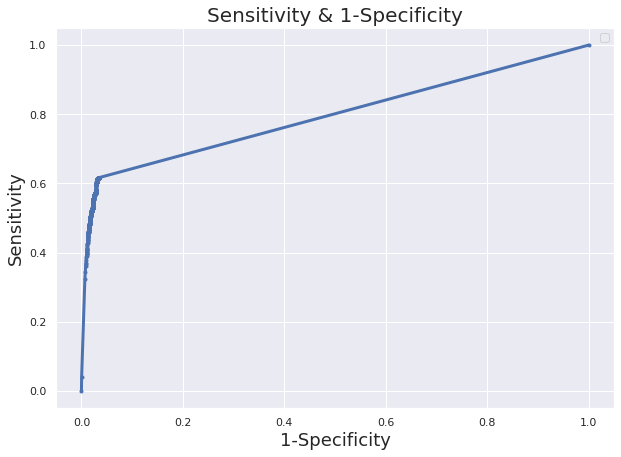

PR AUC (area = 0.80)


In [28]:
    #sen VS spec
import numpy as np
import matplotlib.pyplot as plt
sen= np.array(roc0['tpr'])
spec = np.array(roc0['1-Spec'])

# from matplotlib import pyplot
lw = 3
fig, ax = plt.subplots(figsize=(10, 7))
# plt.axhline(0, lw=2.5, color='black')
# plt.axvline(0, lw=2.5, color='black')
# ax.set_facecolor(('w'))
plt.plot([0, 0],[1, 1],'c', linestyle='--',lw=2.5)
plt.plot(spec,sen,'b', marker='.',lw=lw)  

    # axis labels
plt.xlabel('1-Specificity',fontsize=18)
plt.ylabel('Sensitivity',fontsize=18)
plt.title('Sensitivity & 1-Specificity',fontsize=20)

    # show the legend
plt.legend()
    # show the plot
plt.show()


    # calculate the precision-recall auc
from sklearn.metrics import auc
auc_score = auc(spec, sen)
print('PR AUC (area = %0.2f)' % (auc_score))

No handles with labels found to put in legend.


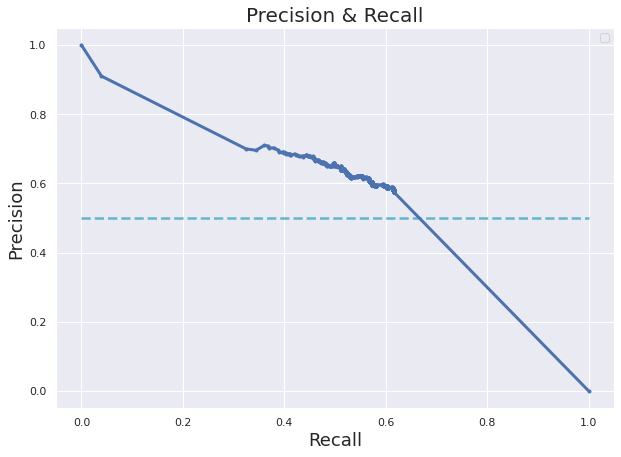

PR AUC (area = 0.57)


In [29]:
import numpy as np
    #Precision & Recall Curve
recall = np.array(roc0['Recall'])
precision = np.array(roc0['Precision'])

import matplotlib.pyplot as plt
from matplotlib import pyplot
lw = 3
fig, ax = plt.subplots(figsize=(10, 7))
# plt.axhline(0, lw=2.5, color='black')
# plt.axvline(0, lw=2.5, color='black')
# ax.set_facecolor(('w'))
fig.patch.set_facecolor('w')
plt.plot([0, 1], [0.5, 0.5],'c', linestyle='--',lw=2.5)
pyplot.plot(recall, precision,'b', marker='.', lw=lw)
    # axis labels
pyplot.xlabel('Recall',fontsize=18)
pyplot.ylabel('Precision',fontsize=18)
pyplot.title('Precision & Recall',fontsize=20)
    # show the legend
pyplot.legend()
    # show the plot
pyplot.show()


    # calculate the precision-recall auc
from sklearn.metrics import auc
auc_score = auc(recall, precision)
print('PR AUC (area = %0.2f)' % (auc_score))

#### -  run ROC curve

In [14]:
import numpy as np
threshold = np.arange(0.0, 1.002, 0.001)
precision, recall, ACC, TPR, FPR, SPEC = list(),list(),list(),list(),list(),list()
TN0, FP0, FN0, TP0 = list(),list(),list(),list()
for i in threshold:
    precision0, recall0, ACC0, TPR0, FPR0, SPEC0 = list(),list(),list(),list(),list(),list()
    
    tn,fp,fn,tp = confusion_matrix_all(data_train,i) 
    try:
        pre = tp/(tp+fp)
        re= tp/(tp+fn)
        acc = (tp+tn)/(tp+tn+fp+fn)
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        spec = 1-(tn/(tn+fp))
    except ZeroDivisionError:
        pre,re,acc,tpr,fpr,spec =1,0,0,0,0,0      
            
    TP0.append(tp)
    TN0.append(tn)
    FP0.append(fp)
    FN0.append(fn)
    precision0.append(pre)
    recall0.append(re)
    ACC0.append(acc)
    TPR0.append(re)
    FPR0.append(fpr)       
    SPEC0.append(spec)
        
    precision.append(precision0)
    recall.append(recall0)
    ACC.append(ACC0)
    TPR.append(TPR0)
    FPR.append(FPR0)       
    SPEC.append(SPEC0)

336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 0 , 456 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 

336 120 51 146
(TN,FP,FN,TP)
( 26 , 430 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 26 , 430 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 28 , 428 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 28 , 428 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 29 , 427 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 29 , 427 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 29 , 427 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 29 , 427 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 29 , 427 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 29 , 427 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 31 , 425 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 32 , 424 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 33 , 423 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 34 , 422 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 34 , 422 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 34 , 422 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 34 , 422 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 35 , 421 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 35 , 421 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 167 , 289 , 5 , 192 )
336 120 51 146
(TN,FP,FN,TP)
( 167 , 289 , 5 , 192 )
336 120 51 146
(TN,FP,FN,TP)
( 169 , 287 , 5 , 192 )
336 120 51 146
(TN,FP,FN,TP)
( 169 , 287 , 5 , 192 )
336 120 51 146
(TN,FP,FN,TP)
( 169 , 287 , 5 , 192 )
336 120 51 146
(TN,FP,FN,TP)
( 169 , 287 , 5 , 192 )
336 120 51 146
(TN,FP,FN,TP)
( 170 , 286 , 5 , 192 )
336 120 51 146
(TN,FP,FN,TP)
( 173 , 283 , 5 , 192 )
336 120 51 146
(TN,FP,FN,TP)
( 176 , 280 , 5 , 192 )
336 120 51 146
(TN,FP,FN,TP)
( 178 , 278 , 5 , 192 )
336 120 51 146
(TN,FP,FN,TP)
( 179 , 277 , 5 , 192 )
336 120 51 146
(TN,FP,FN,TP)
( 180 , 276 , 5 , 192 )
336 120 51 146
(TN,FP,FN,TP)
( 180 , 276 , 5 , 192 )
336 120 51 146
(TN,FP,FN,TP)
( 183 , 273 , 5 , 192 )
336 120 51 146
(TN,FP,FN,TP)
( 183 , 273 , 5 , 192 )
336 120 51 146
(TN,FP,FN,TP)
( 184 , 272 , 5 , 192 )
336 120 51 146
(TN,FP,FN,TP)
( 184 , 272 , 5 , 192 )
336 120 51 146
(TN,FP,FN,TP)
( 185 , 271 , 5 , 192 )
336 120 51 146
(TN,FP,FN,TP)
( 186 , 270 , 6 ,

336 120 51 146
(TN,FP,FN,TP)
( 309 , 147 , 41 , 156 )
336 120 51 146
(TN,FP,FN,TP)
( 312 , 144 , 41 , 156 )
336 120 51 146
(TN,FP,FN,TP)
( 312 , 144 , 41 , 156 )
336 120 51 146
(TN,FP,FN,TP)
( 312 , 144 , 41 , 156 )
336 120 51 146
(TN,FP,FN,TP)
( 315 , 141 , 41 , 156 )
336 120 51 146
(TN,FP,FN,TP)
( 316 , 140 , 42 , 155 )
336 120 51 146
(TN,FP,FN,TP)
( 316 , 140 , 42 , 155 )
336 120 51 146
(TN,FP,FN,TP)
( 317 , 139 , 43 , 154 )
336 120 51 146
(TN,FP,FN,TP)
( 318 , 138 , 43 , 154 )
336 120 51 146
(TN,FP,FN,TP)
( 318 , 138 , 43 , 154 )
336 120 51 146
(TN,FP,FN,TP)
( 319 , 137 , 44 , 153 )
336 120 51 146
(TN,FP,FN,TP)
( 320 , 136 , 45 , 152 )
336 120 51 146
(TN,FP,FN,TP)
( 322 , 134 , 45 , 152 )
336 120 51 146
(TN,FP,FN,TP)
( 322 , 134 , 46 , 151 )
336 120 51 146
(TN,FP,FN,TP)
( 323 , 133 , 47 , 150 )
336 120 51 146
(TN,FP,FN,TP)
( 326 , 130 , 47 , 150 )
336 120 51 146
(TN,FP,FN,TP)
( 326 , 130 , 48 , 149 )
336 120 51 146
(TN,FP,FN,TP)
( 329 , 127 , 48 , 149 )
336 120 51 146
(TN,FP,FN,TP)

336 120 51 146
(TN,FP,FN,TP)
( 418 , 38 , 105 , 92 )
336 120 51 146
(TN,FP,FN,TP)
( 418 , 38 , 105 , 92 )
336 120 51 146
(TN,FP,FN,TP)
( 420 , 36 , 105 , 92 )
336 120 51 146
(TN,FP,FN,TP)
( 422 , 34 , 105 , 92 )
336 120 51 146
(TN,FP,FN,TP)
( 422 , 34 , 105 , 92 )
336 120 51 146
(TN,FP,FN,TP)
( 423 , 33 , 106 , 91 )
336 120 51 146
(TN,FP,FN,TP)
( 424 , 32 , 107 , 90 )
336 120 51 146
(TN,FP,FN,TP)
( 425 , 31 , 108 , 89 )
336 120 51 146
(TN,FP,FN,TP)
( 426 , 30 , 108 , 89 )
336 120 51 146
(TN,FP,FN,TP)
( 426 , 30 , 108 , 89 )
336 120 51 146
(TN,FP,FN,TP)
( 426 , 30 , 108 , 89 )
336 120 51 146
(TN,FP,FN,TP)
( 426 , 30 , 108 , 89 )
336 120 51 146
(TN,FP,FN,TP)
( 426 , 30 , 110 , 87 )
336 120 51 146
(TN,FP,FN,TP)
( 426 , 30 , 110 , 87 )
336 120 51 146
(TN,FP,FN,TP)
( 426 , 30 , 110 , 87 )
336 120 51 146
(TN,FP,FN,TP)
( 427 , 29 , 111 , 86 )
336 120 51 146
(TN,FP,FN,TP)
( 427 , 29 , 112 , 85 )
336 120 51 146
(TN,FP,FN,TP)
( 428 , 28 , 114 , 83 )
336 120 51 146
(TN,FP,FN,TP)
( 428 , 28 , 114 

336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 162 , 35 )
336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 163 , 34 )
336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 164 , 33 )
336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 164 , 33 )
336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 164 , 33 )
336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 164 , 33 )
336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 164 , 33 )
336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 164 , 33 )
336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 165 , 32 )
336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 165 , 32 )
336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 165 , 32 )
336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 165 , 32 )
336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 166 , 31 )
336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 166 , 31 )
336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 168 , 29 )
336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 169 , 28 )
336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 169 , 28 )
336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 169 , 28 )
336 120 51 146
(TN,FP,FN,TP)
( 451 , 5 , 170 , 27 )
336 120 51 1

/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 456 , 0 , 197 , 0 )
336 120 51 146
(TN,FP,FN,TP)
( 

In [15]:
#average per threshold 
precision1,recall1,ACC1,TPR1,FPR1,SPEC1 = list(),list(),list(),list(),list(),list()
from statistics import *
for m in range(0,len(precision)):
    a1 =mean(precision[m])
    a2 =mean(recall[m])
    a3 =mean(ACC[m])
    a4 =mean(TPR[m])
    a5 =mean(FPR[m])
    a6 =mean(SPEC[m])
    
    precision1.append(a1)
    recall1.append(a2)
    ACC1.append(a3)
    TPR1.append(a4)
    FPR1.append(a5)       
    SPEC1.append(a6)   

In [16]:
#create dataframe
import numpy as np
i = np.arange(len(precision1)) # index for df
roc0 = pd.DataFrame({'Threshold' : pd.Series(threshold, index=i),'Precision' : pd.Series(precision1, index = i),'Recall' : pd.Series(recall1, index = i),
                     'tpr' : pd.Series(TPR1, index = i),'fpr' : pd.Series(FPR1, index = i),'1-Spec' : pd.Series(SPEC1, index = i),  'ACC' : pd.Series(ACC1, index = i), 
                     'TN' : pd.Series(TN0, index = i), 'FP' : pd.Series(FP0, index = i), 'FN' : pd.Series(FN0, index = i), 'TP' : pd.Series(TP0, index = i)},)
roc0 = roc0.fillna(1)

In [17]:
roc0.head(10)

,Threshold,Precision,Recall,tpr,fpr,1-Spec,ACC,TN,FP,FN,TP
0,0.000,0.301685,1.0,1.0,1.0,1.0,0.301685,0,456,0,197
1,0.001,0.301685,1.0,1.0,1.0,1.0,0.301685,0,456,0,197
2,0.002,0.301685,1.0,1.0,1.0,1.0,0.301685,0,456,0,197
3,0.003,0.301685,1.0,1.0,1.0,1.0,0.301685,0,456,0,197
4,0.004,0.301685,1.0,1.0,1.0,1.0,0.301685,0,456,0,197
5,0.005,0.301685,1.0,1.0,1.0,1.0,0.301685,0,456,0,197
6,0.006,0.301685,1.0,1.0,1.0,1.0,0.301685,0,456,0,197
7,0.007,0.301685,1.0,1.0,1.0,1.0,0.301685,0,456,0,197
8,0.008,0.301685,1.0,1.0,1.0,1.0,0.301685,0,456,0,197
9,0.009,0.301685,1.0,1.0,1.0,1.0,0.301685,0,456,0,197


#### -  sen VS spec

No handles with labels found to put in legend.


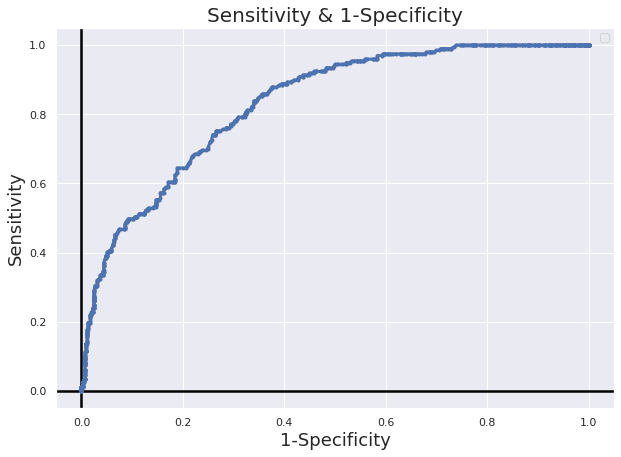

PR AUC (area = 0.83)


In [18]:
#sen VS spec
import numpy as np
import matplotlib.pyplot as plt
sen= np.array(roc0['tpr'])
spec = np.array(roc0['1-Spec'])
# from matplotlib import pyplot
lw = 3
fig, ax = plt.subplots(figsize=(10, 7))
plt.axhline(0, lw=2.5, color='black')
plt.axvline(0, lw=2.5, color='black')
plt.plot([0, 0],[1, 1],'c', linestyle='--',lw=2.5)
plt.plot(spec,sen,'b', marker='.',lw=lw)  
    # axis labels
plt.xlabel('1-Specificity',fontsize=18)
plt.ylabel('Sensitivity',fontsize=18)
plt.title('Sensitivity & 1-Specificity',fontsize=20)
    # show the legend
plt.legend()
    # show the plot
plt.show()
    # calculate the precision-recall auc
from sklearn.metrics import auc
auc_score = auc(spec, sen)
print('PR AUC (area = %0.2f)' % (auc_score))

#### -  Precision & Recall Curve

No handles with labels found to put in legend.


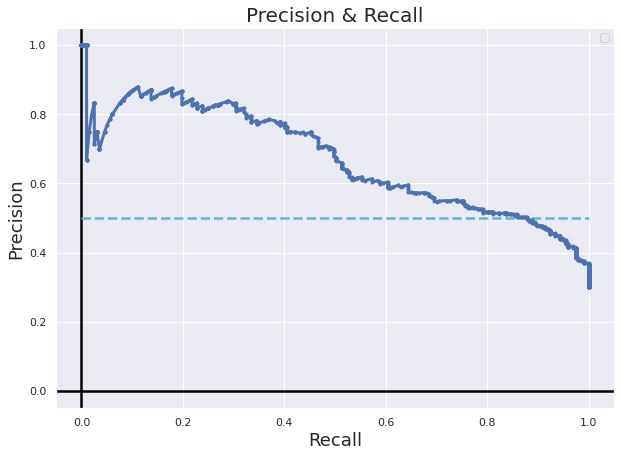

PR AUC (area = 0.67)


In [19]:
#Precision & Recall Curve
import numpy as np
recall = np.array(roc0['Recall'])
precision = np.array(roc0['Precision'])

import matplotlib.pyplot as plt
from matplotlib import pyplot
lw = 3
fig, ax = plt.subplots(figsize=(10, 7))
plt.axhline(0, lw=2.5, color='black')
plt.axvline(0, lw=2.5, color='black')
fig.patch.set_facecolor('w')
plt.plot([0, 1], [0.5, 0.5],'c', linestyle='--',lw=2.5)
pyplot.plot(recall, precision,'b', marker='.', lw=lw)
    # axis labels
pyplot.xlabel('Recall',fontsize=18)
pyplot.ylabel('Precision',fontsize=18)
pyplot.title('Precision & Recall',fontsize=20)
    # show the legend
pyplot.legend()
    # show the plot
pyplot.show()
    # calculate the precision-recall auc
from sklearn.metrics import auc
auc_score = auc(recall, precision)
print('PR AUC (area = %0.2f)' % (auc_score))

## Threshold 

In [20]:
#Select the best threshold
FN_min = roc0[roc0.FN == roc0.FN.min()]
FP_min = FN_min[FN_min.FP == FN_min.FP.min()]
FP_min

,Threshold,Precision,Recall,tpr,fpr,1-Spec,ACC,TN,FP,FN,TP
280,0.28,0.368914,1.0,1.0,0.739035,0.739035,0.48392,119,337,0,197


In [21]:
import numpy as np
# threshold = np.arange(0.0, 1.002, 0.001)
threshold = np.arange(0.2, 0.3, 0.00001)
precision, recall, ACC, TPR, FPR, SPEC = list(),list(),list(),list(),list(),list()
TN0, FP0, FN0, TP0 = list(),list(),list(),list()
for i in threshold:
    precision0, recall0, ACC0, TPR0, FPR0, SPEC0 = list(),list(),list(),list(),list(),list()
    
    tn,fp,fn,tp = confusion_matrix_all(data_train,i) 
    try:
        pre = tp/(tp+fp)
        re= tp/(tp+fn)
        acc = (tp+tn)/(tp+tn+fp+fn)
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        spec = 1-(tn/(tn+fp))
    except ZeroDivisionError:
        pre,re,acc,tpr,fpr,spec =1,0,0,0,0,0      
            
    TP0.append(tp)
    TN0.append(tn)
    FP0.append(fp)
    FN0.append(fn)
    precision0.append(pre)
    recall0.append(re)
    ACC0.append(acc)
    TPR0.append(re)
    FPR0.append(fpr)       
    SPEC0.append(spec)
        
    precision.append(precision0)
    recall.append(recall0)
    ACC.append(ACC0)
    TPR.append(TPR0)
    FPR.append(FPR0)       
    SPEC.append(SPEC0)

336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 48 , 408 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 51 , 405 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 53 , 403 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 54 , 402 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 55 , 401 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 56 , 400 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 56 , 400 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 56 , 400 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 56 , 400 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 56 , 400 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 56 , 400 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 56 , 400 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 56 , 400 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 56 , 400 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 56 , 400 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 56 , 400 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 56 , 400 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 56 , 400 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 56 , 400 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 56 , 400 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 57 , 399 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 59 , 397 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 60 , 396 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 64 , 392 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 65 , 391 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 66 , 390 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 67 , 389 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 69 , 387 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 70 , 386 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 71 , 385 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 71 , 385 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 71 , 385 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 71 , 385 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 71 , 385 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 71 , 385 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 71 , 385 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 71 , 385 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 71 , 385 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 71 , 385 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 71 , 385 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 71 , 385 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 71 , 385 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 71 , 385 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 71 , 385 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 72 , 384 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 72 , 384 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 72 , 384 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 72 , 384 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 73 , 383 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 74 , 382 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 77 , 379 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 77 , 379 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 78 , 378 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 81 , 375 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 85 , 371 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 86 , 370 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 87 , 369 , 0 , 197 )
336 120 51 1

( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 88 , 368 ,

( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 90 , 366 ,

336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 91 , 365 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 92 , 364 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 93 , 363 , 0 , 197 )
336 120 51 1

( 94 , 362 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 94 , 362 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 94 , 362 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 94 , 362 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 94 , 362 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 94 , 362 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 94 , 362 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 94 , 362 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 94 , 362 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 94 , 362 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 94 , 362 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 94 , 362 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 94 , 362 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 94 , 362 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 94 , 362 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 94 , 362 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 94 , 362 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 95 , 361 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 95 , 361 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 95 , 361 ,

336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 98 , 358 , 0 , 197 )
336 120 51 1

336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 ,

336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 101 , 355 , 0 ,

336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 102 , 354 , 0 ,

336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 103 , 353 , 0 ,

336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 ,

336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 104 , 352 , 0 ,

336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 105 , 351 , 0 ,

(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 107 , 349 , 0 , 197 )
336 120 

336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 109 , 347 , 0 ,

336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 ,

336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 113 , 343 , 0 ,

336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 115 , 341 , 0 ,

( 116 , 340 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 116 , 340 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 116 , 340 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 116 , 340 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 116 , 340 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 116 , 340 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 116 , 340 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 116 , 340 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 116 , 340 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 116 , 340 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 116 , 340 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 116 , 340 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 116 , 340 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 116 , 340 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 116 , 340 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 116 , 340 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 116 , 340 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 117 , 339 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 117 , 339 , 0 , 197 )
336 120 51 146
(TN,FP,

336 120 51 146
(TN,FP,FN,TP)
( 120 , 336 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 120 , 336 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 120 , 336 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 120 , 336 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 120 , 336 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 120 , 336 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 120 , 336 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 120 , 336 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 120 , 336 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 120 , 336 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 121 , 335 , 0 , 197 )
336 120 51 146
(TN,FP,FN,TP)
( 121 , 335 , 1 , 196 )
336 120 51 146
(TN,FP,FN,TP)
( 121 , 335 , 1 , 196 )
336 120 51 146
(TN,FP,FN,TP)
( 121 , 335 , 1 , 196 )
336 120 51 146
(TN,FP,FN,TP)
( 121 , 335 , 1 , 196 )
336 120 51 146
(TN,FP,FN,TP)
( 121 , 335 , 1 , 196 )
336 120 51 146
(TN,FP,FN,TP)
( 121 , 335 , 1 , 196 )
336 120 51 146
(TN,FP,FN,TP)
( 121 , 335 , 1 , 196 )
336 120 51 146
(TN,FP,FN,TP)
( 121 , 335 , 1 ,

(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 124 , 332 , 2 , 195 )
336 120 

336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 125 , 331 , 2 ,

( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 128 , 328 , 2 , 195 )
336 120 51 146
(TN,FP,

336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 ,

( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 130 , 326 , 2 , 195 )
336 120 51 146
(TN,FP,

336 120 51 146
(TN,FP,FN,TP)
( 133 , 323 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 133 , 323 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 133 , 323 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 133 , 323 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 133 , 323 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 133 , 323 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 133 , 323 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 133 , 323 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 133 , 323 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 133 , 323 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 133 , 323 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 133 , 323 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 133 , 323 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 134 , 322 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 134 , 322 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 134 , 322 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 134 , 322 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 134 , 322 , 2 , 195 )
336 120 51 146
(TN,FP,FN,TP)
( 134 , 322 , 2 ,

336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 , 194 )
336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 , 194 )
336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 , 194 )
336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 , 194 )
336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 , 194 )
336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 , 194 )
336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 , 194 )
336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 , 194 )
336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 , 194 )
336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 , 194 )
336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 , 194 )
336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 , 194 )
336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 , 194 )
336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 , 194 )
336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 , 194 )
336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 , 194 )
336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 , 194 )
336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 , 194 )
336 120 51 146
(TN,FP,FN,TP)
( 137 , 319 , 3 ,

336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 139 , 317 , 4 ,

336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 141 , 315 , 4 ,

336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 ,

336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 143 , 313 , 4 ,

(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 51 146
(TN,FP,FN,TP)
( 144 , 312 , 4 , 193 )
336 120 

In [22]:
#average per threshold 
precision1,recall1,ACC1,TPR1,FPR1,SPEC1 = list(),list(),list(),list(),list(),list()
from statistics import *
for m in range(0,len(precision)):
    a1 =mean(precision[m])
    a2 =mean(recall[m])
    a3 =mean(ACC[m])
    a4 =mean(TPR[m])
    a5 =mean(FPR[m])
    a6 =mean(SPEC[m])
    
    precision1.append(a1)
    recall1.append(a2)
    ACC1.append(a3)
    TPR1.append(a4)
    FPR1.append(a5)       
    SPEC1.append(a6)   

In [23]:
#create dataframe
import numpy as np
i = np.arange(len(precision1)) # index for df
roc0 = pd.DataFrame({'Threshold' : pd.Series(threshold, index=i),'Precision' : pd.Series(precision1, index = i),'Recall' : pd.Series(recall1, index = i),
                     'tpr' : pd.Series(TPR1, index = i),'fpr' : pd.Series(FPR1, index = i),'1-Spec' : pd.Series(SPEC1, index = i),  'ACC' : pd.Series(ACC1, index = i), 
                     'TN' : pd.Series(TN0, index = i), 'FP' : pd.Series(FP0, index = i), 'FN' : pd.Series(FN0, index = i), 'TP' : pd.Series(TP0, index = i)},)
roc0 = roc0.fillna(1)

In [24]:
#Select the best threshold
FN_min = roc0[roc0.FN == roc0.FN.min()]
FP_min = FN_min[FN_min.FP == FN_min.FP.min()]
FP_min

,Threshold,Precision,Recall,tpr,fpr,1-Spec,ACC,TN,FP,FN,TP
8076,0.28076,0.370301,1.0,1.0,0.734649,0.734649,0.486983,121,335,0,197


In [25]:
threshold = FP_min['Threshold'].tolist()[0]
threshold

0.2807600000000808

In [26]:


    #1. manage data  --------------------------------------------------------------------------------------------------------------------------------------------------

    p1 = data_train #Input table   
    act= p1['Class'].map({'Normal':0,'Abnormal':1}).values
    pred = p1['category'].map({'Normal':0,'Abnormal':1}).values

    import numpy as np
    n = len(p1)
    proplist = list()
    for i in range(0,n):
        score = p1.iloc[i].to_numpy()
        if score[10]=='Normal':
            prob = 1 - score[11]
            proplist.append(prob)
        else:
            prob = score[11]
            proplist.append(prob)


    prob_all =np.array(proplist)

#2. เงื่อนไข ---------------------------------------------------------------------------------------------------------------------------------------------
    
    import numpy as np
    from sklearn.metrics import confusion_matrix

    TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
    print(TN, FP, FN, TP)

# 3. threshold ----------------------------------------------------------------


    import numpy as np
    from sklearn.metrics import confusion_matrix
    
    t = prob_all >= threshold
    #replace
    ts =t.tolist()
    alist =list()
    for i in range(0,len(ts)):
        if ts[i]==  True:
            a = 1
            alist.append(a)
        else:
            a = 0
            alist.append(a)

    tn, fp, fn, tp = confusion_matrix(act, alist).ravel()

    print('(TN,FP,FN,TP)')
    print('(',tn,',', fp,',', fn,',', tp,')')



336 120 51 146
(TN,FP,FN,TP)
( 121 , 335 , 0 , 197 )


In [27]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
# confusion_matrix(act, pred)
print(classification_report(act, alist))#performance

              precision    recall  f1-score   support

           0       1.00      0.27      0.42       456
           1       0.37      1.00      0.54       197

    accuracy                           0.49       653
   macro avg       0.69      0.63      0.48       653
weighted avg       0.81      0.49      0.46       653



In [28]:
#replace
#0,1 -> Abnormal,Normal
pred_theshold =list()
for i in range(0,len(alist)):
    if alist[i]== 1:
        a = 'Abnormal'
        pred_theshold.append(a)
    else:
        a = 'Normal'
        pred_theshold.append(a)

In [29]:
#prob
import numpy as np
n = len(p1)
proplist = list()
for i in range(0,n):
    score = p1.iloc[i].to_numpy()
    if score[10]=='Normal':
        prob = 1 - score[11]
        proplist.append(prob)
    else:
        prob = score[11]
        proplist.append(prob)

prob_all =np.array(proplist)


resdf = list()
import numpy as np

act= p1['Class']
prob= p1['category']
path_= p1['Path Crop']
SubPosi= p1['Sub Position']

act = act.reset_index(drop=True)
prob = prob.reset_index(drop=True)
path_ = path_.reset_index(drop=True)
SubPosi = SubPosi.reset_index(drop=True)

for i in range(0,len(p1)):
    act_true = act[i]
    pred_max= pred_theshold[i]
    prob_new= prob[i]
    prob_old = prob_all[i]
    subposi = SubPosi[i]
    path = path_[i]
    
    resdf.append({'SubPosition':subposi,'Actual':act_true,'Predicted':pred_max, 'prob_new':prob_new, 'prob_old':prob_old, 'path':path})
res_df = pd.DataFrame(resdf)
res_df

,SubPosition,Actual,Predicted,prob_new,prob_old,path
0,P31,Abnormal,Abnormal,Abnormal,0.780594,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...
1,P1,Abnormal,Abnormal,Abnormal,0.680364,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...
2,P2,Abnormal,Abnormal,Abnormal,0.707125,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...
3,P42,Abnormal,Abnormal,Abnormal,0.831161,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...
4,P41,Abnormal,Abnormal,Abnormal,0.739034,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...
...,...,...,...,...,...,...
648,P72,Normal,Normal,Normal,0.085450,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...
649,P72,Normal,Abnormal,Normal,0.490216,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...
650,P72,Normal,Abnormal,Normal,0.316694,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...
651,P72,Normal,Abnormal,Abnormal,0.505357,/media/tohn/HDD/VISION_dataset/USAI/FPD JULY 2...


In [30]:
data = {'Actual': act,'Predicted' : pred_theshold,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])
conf_mat

Predicted,Abnormal,Normal
Actual,,
Abnormal,197,0
Normal,335,121


Text(0.5, 21.5, 'Predicted label')

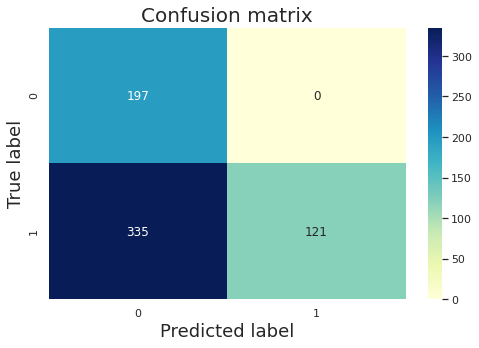

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred_theshold)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm , annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

# Grad CAM

### - create dataframe for Grad CAM 

In [ ]:
#สร้าง folder เก็บรูป 
import os
import shutil

path0 = "/media/tohn/SSD/image/test_GradCam/B0_val" 

try:
    os.mkdir(path0)
except OSError:
    shutil.rmtree(path0)
    os.mkdir(path0)

In [ ]:
#สร้าง folder เก็บรูป 
import os
import shutil

path1 = path0+'/abn_correct/'
path2 = path0+'/abn_missing/'
path3 = path0+'/Nor_correct/'
path4 = path0+'/Nor_missing/'
try:
    os.mkdir(path1)
    os.mkdir(path2)
    os.mkdir(path3)
    os.mkdir(path4)
except OSError:
    shutil.rmtree(path1)
    shutil.rmtree(path2)
    shutil.rmtree(path3)
    shutil.rmtree(path4)
    os.mkdir(path1)
    os.mkdir(path2)
    os.mkdir(path3)
    os.mkdir(path4)

### - Abnormal 

In [ ]:
#load image function
def load_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    return x,img

In [ ]:
df = dataframe
abnormal  = df[df['Class']=='Abnormal']
ab_correct = abnormal[abnormal['Class']==abnormal['category']] # correct
ab_wrong = abnormal[abnormal['Class']!=abnormal['category']]
#select position 
print('abnormal:',len(abnormal))
print('ab_correct:',len(ab_correct))
print('ab_wrong:',len(ab_wrong))
print(len(set(ab_correct['Sub Position'])))
print(set(ab_correct['Sub Position']))

####  ab_correct 

##### TF-explain 

In [ ]:
#### load only max &min prob of each views(P1,P2,P31,...,P72) *** For correct
max_df = list()
min_df = list()
classs = list(set(ab_correct['Sub Position']))
for i in classs:
    posi = ab_correct[ab_correct['Sub Position'] == i]
    #max
    max_prob = posi[posi['Prob'] == posi['Prob'].max()][0:1].reset_index()
    SubPosi = i
    case = 'ab_correct'
    case_prob = 'Max'
    prob = max_prob['Prob'].tolist()[0]
    path = max_prob['Path Crop'].tolist()[0]

    max_df.append({'Sub Position':SubPosi,'Case':case,'Case_prob':case_prob,'Prob':prob,'Path':path})
    
    #min
    min_prob = posi[posi['Prob'] == posi['Prob'].min()][0:1].reset_index()
    SubPosi = i
    case = 'ab_correct'
    case_prob = 'Min'
    prob = min_prob['Prob'].tolist()[0]
    path = min_prob['Path Crop'].tolist()[0]

    min_df.append({'Sub Position':SubPosi,'Case':case,'Case_prob':case_prob,'Prob':prob,'Path':path})
tabktdf = pd.DataFrame(max_df+min_df)
tabktdf

In [ ]:
img_paths = tabktdf['Path'].tolist()
case = tabktdf['Case_prob'].tolist()
prob = tabktdf['Prob'].round(4).tolist()
imlist = list()
idx = range(0,len(img_paths))
for i in idx :
    j = img_paths[i]
    imlist.append(j)
    j = j.split('/')[-1]
    os.chdir(path1)
    import cv2
    from matplotlib import pyplot as plt
    from tf_explain.core.grad_cam import GradCAM
    explainer = GradCAM()

    img,ori = load_image(img_paths[i])
    data = (img, None)

    grid = explainer.explain(data, model, class_index=0)
    
    explainer.save(grid,'.',"ab_cor_"+str(i)+"_"+str(case[i])+"_"+str(prob[i])+"_"+str(j)+".png")
print(len(imlist))

##### Load USAI image 

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
# load the image
idx = imlist
for i in idx :
    j = i
    j = j.split('/')[-1]
    img = image.load_img(i)
    os.chdir(path1)
    save_img(str(j)+'.png', img)
print(len(imlist))

####  ab_wrong

In [ ]:
print('nor_wrong:',len(ab_wrong))
w_img_paths = ab_wrong['Path Crop'].tolist()
w_prob = ab_wrong['Prob'].round(4).tolist()
ab_wrong.shape

In [ ]:
imlist = list()
idx = range(0,len(w_img_paths))
for i in idx :
    j = w_img_paths[i]
    imlist.append(j)
    j = j.split('/')[-1]
#     print(j)
    os.chdir(path2)
    import cv2
    from matplotlib import pyplot as plt
    from tf_explain.core.grad_cam import GradCAM
    explainer = GradCAM()

    img,ori = load_image(w_img_paths[i])
    data = (img, None)

    grid = explainer.explain(data, model, class_index=0) 
    explainer.save(grid,'.',"Nor_missing_"+str(w_prob[i])+"_"+str(j)+"_"+str(i)+".png")
print(len(imlist))

#####  Load USAI image

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
idx = imlist
for i in idx :
    j = i
    j = j.split('/')[-1]
    img = image.load_img(i)
    os.chdir(path2)
    save_img(str(j)+'.png', img)
print(len(imlist))

#### *Show Correct Abnormal GradCam*

In [ ]:
from tf_explain.core.grad_cam import GradCAM
explainer = GradCAM()
img,ori = load_image(img_paths[0])
data = (img, None)
grid = explainer.explain(data, model, class_index=1) 
explainer.save(grid, ".", "grad_cam.png")
print(img_paths[0])
plt.imshow(grid)

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread(img_paths[0])
plt.imshow(img)

#### *Show Miss Abnormal GradCam*

In [ ]:
from tf_explain.core.grad_cam import GradCAM
explainer = GradCAM()
img,ori = load_image(w_img_paths[0])
data = (img, None)
grid = explainer.explain(data, model, class_index=1) 
explainer.save(grid, ".", "grad_cam.png")
print(img_paths[0])
plt.imshow(grid)

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread(w_img_paths[0])
plt.imshow(img)

### Normal

In [ ]:
df = dataframe
normal  = df[df['Class']=='Normal']
nor_correct = normal[normal['Class']==normal['category']] # correct
nor_wrong = normal[normal['Class']!=normal['category']]
print('normal:',len(normal))
print('nor_correct:',len(nor_correct))
print('nor_wrong:',len(nor_wrong))
#select position 
print(len(set(nor_correct['Sub Position'])))
print(set(nor_correct['Sub Position']))

#### nor_correct 

##### TF-explain

In [ ]:
#### load only max &min prob of each views(P1,P2,P31,...,P72) *** For correct
max_df = list()
min_df = list()
classs = list(set(nor_correct['Sub Position']))
for i in classs:
    posi = nor_correct[nor_correct['Sub Position'] == i]
    #max
    max_prob = posi[posi['Prob'] == posi['Prob'].max()][0:1].reset_index()
    SubPosi = i
    case = 'nor_correct'
    case_prob = 'Max'
    prob = max_prob['Prob'].tolist()[0]
    path = max_prob['Path Crop'].tolist()[0]

    max_df.append({'Sub Position':SubPosi,'Case':case,'Case_prob':case_prob,'Prob':prob,'Path':path})
    
    #min
    min_prob = posi[posi['Prob'] == posi['Prob'].min()][0:1].reset_index()
    SubPosi = i
    case = 'nor_correct'
    case_prob = 'Min'
    prob = min_prob['Prob'].tolist()[0]
    path = min_prob['Path Crop'].tolist()[0]

    min_df.append({'Sub Position':SubPosi,'Case':case,'Case_prob':case_prob,'Prob':prob,'Path':path})
tabktdf = pd.DataFrame(max_df+min_df)
tabktdf

In [ ]:
#Load Grad Cam image

img_paths = tabktdf['Path'].tolist()
case = tabktdf['Case_prob'].tolist()
prob = tabktdf['Prob'].round(4).tolist()

imlist = list()
idx = range(0,len(img_paths))
for i in idx :
    j = img_paths[i]
    imlist.append(j)
    j = j.split('/')[-1]
    os.chdir(path3)
    import cv2
    from matplotlib import pyplot as plt
    from tf_explain.core.grad_cam import GradCAM
    explainer = GradCAM()

    img,ori = load_image(img_paths[i])
    data = (img, None)

    grid = explainer.explain(data, model, class_index=0) 
    explainer.save(grid,'.',"nor_cor_"+str(i)+"_"+str(case[i])+"_"+str(prob[i])+"_"+str(j)+".png")
print(len(imlist))

#####  Load USAI image

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
# load the image
idx = imlist
for i in idx :
    j = i
    j = j.split('/')[-1]
    img = image.load_img(i)
    os.chdir(path3)
    save_img(str(j)+'.png', img)
print(len(imlist))

#### Normal Miss

In [ ]:
print('nor_wrong:',len(nor_wrong))

In [ ]:
w_img_paths = nor_wrong['Path Crop'].tolist()
w_prob = nor_wrong['Prob'].round(4).tolist()
nor_wrong.shape

In [ ]:
imlist = list()
idx = range(0,len(w_img_paths))
for i in idx :
    j = w_img_paths[i]
    imlist.append(j)
    j = j.split('/')[-1]
#     print(j)
    os.chdir(path4)
    import cv2
    from matplotlib import pyplot as plt
    from tf_explain.core.grad_cam import GradCAM
    explainer = GradCAM()

    img,ori = load_image(w_img_paths[i])
    data = (img, None)

    grid = explainer.explain(data, model, class_index=0) 
    explainer.save(grid,'.',"Nor_missing_"+str(w_prob[i])+"_"+str(j)+"_"+str(i)+".png")
print(len(imlist))

##### Load USAI image 

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
idx = imlist
for i in idx :
    j = i
    j = j.split('/')[-1]
    img = image.load_img(i)
    os.chdir(path4)
    save_img(str(j)+'.png', img)
print(len(imlist))

##### *Show Correct NormalGradCam*

In [ ]:
from tf_explain.core.grad_cam import GradCAM
explainer = GradCAM()
img,ori = load_image(img_paths[0])
data = (img, None)
grid = explainer.explain(data, model, class_index=1) 
explainer.save(grid, ".", "grad_cam.png")
print(img_paths[0])
plt.imshow(grid)

In [ ]:
img = mpimg.imread(img_paths[0])
plt.imshow(img)

##### *Show Miss Normal GradCam*

In [ ]:
from tf_explain.core.grad_cam import GradCAM
explainer = GradCAM()
img,ori = load_image(w_img_paths[0])
data = (img, None)
grid = explainer.explain(data, model, class_index=1) 
explainer.save(grid, ".", "grad_cam.png")
print(img_paths[0])
plt.imshow(grid)

In [ ]:
img = mpimg.imread(w_img_paths[0])
plt.imshow(img)